<a href="https://colab.research.google.com/github/FadQode/Scil-try1/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Persiapan dan Evaluasi Data

## Mengecek Null Data, Duplikasi, dan Outlier

In [ ]:
# masukkan data dan jadikan sebuah dataframe object dengan pandas
cancer = pd.read_csv('/content/sample_data/uci-breast-cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Mengevaluasi dataset 1: mengecek nilai null dalam dataset
cancer.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
print("Data duplicated: ", cancer.duplicated().sum())

Data duplicated:  0


In [ ]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Eksplorasi dan Pra-Pemrosesan Data

## Mengevaluasi dan Menyaring Feature yang akan digunakan

### Menggunakan Correlation Method milik pandas

In [ ]:
#Sorting feature dengan korelasi tertinggi dengan diagnosis
cancer['diagnosis'] = cancer['diagnosis'].replace({'M': 1, 'B': 0})
corr_matrix = cancer.corr()

target_corr = corr_matrix['diagnosis'].sort_values(ascending=False)
print(target_corr)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

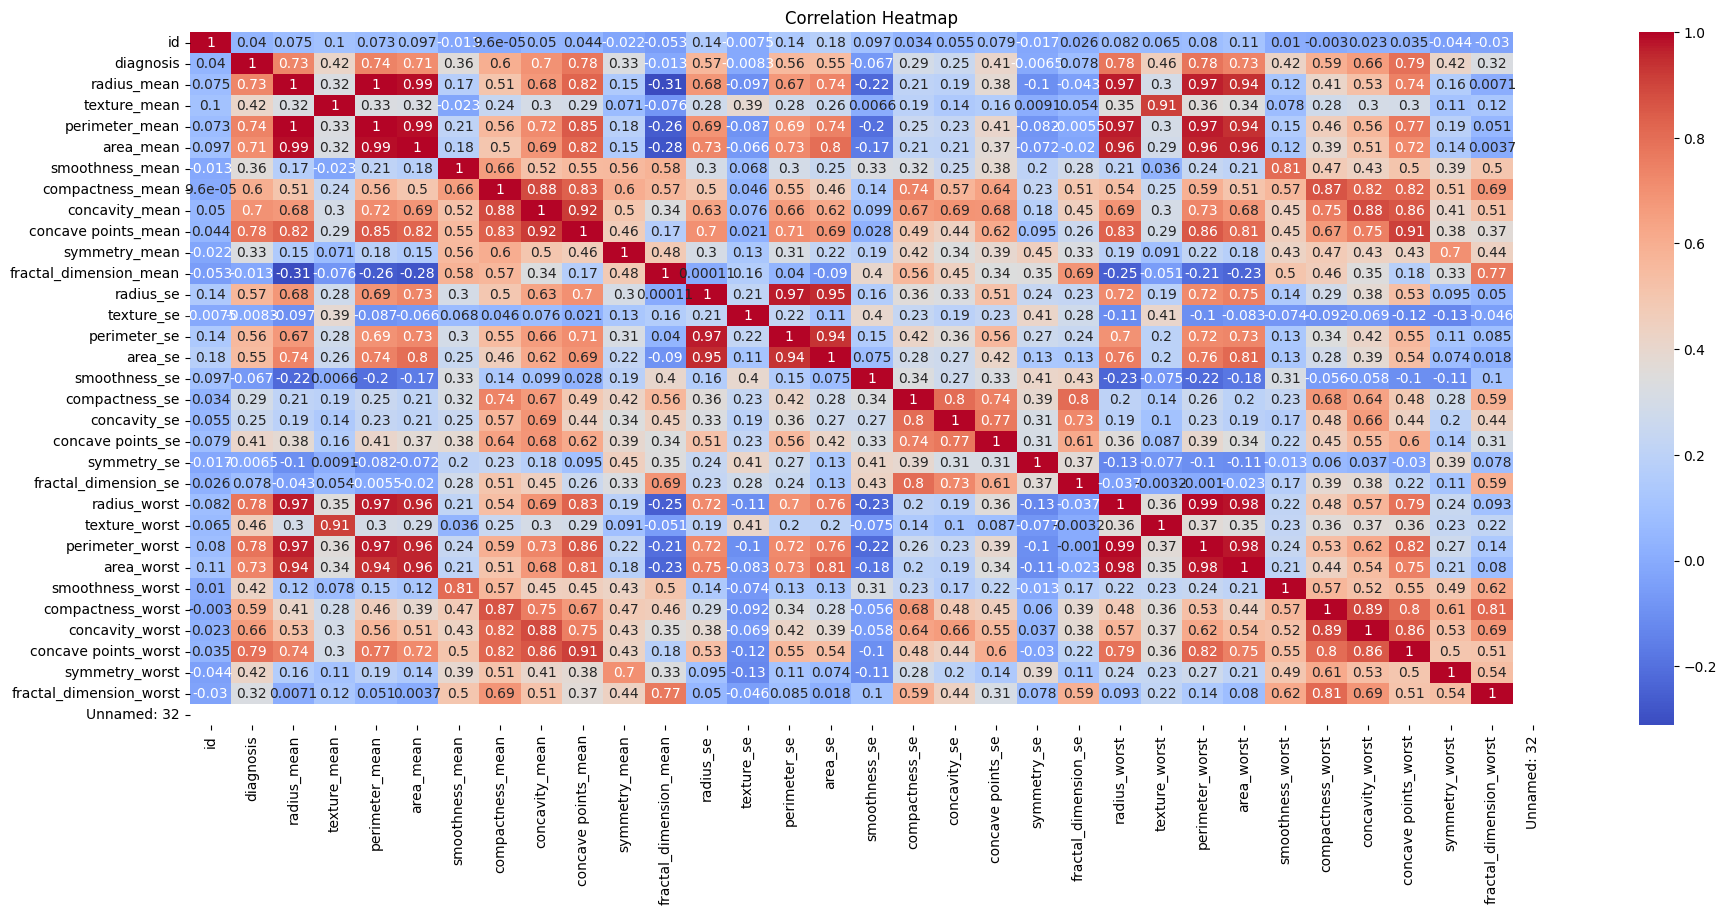

In [ ]:
# Visualisasi Korelasi satu feature dengan feature yang lain
plt.figure(figsize=(22, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
selected_features_corr = target_corr[(target_corr >= 0.7)]
print(selected_features_corr)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis, dtype: float64


In [ ]:
selected_features_corr_ls = selected_features_corr.index.tolist()
print(selected_features_corr_ls)
cancer_corr = pd.DataFrame(cancer[selected_features_corr_ls])
cancer_corr.describe()

['diagnosis', 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']


,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104
std,0.483918,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129
min,0.000000,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000
25%,0.000000,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000
50%,0.000000,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000
75%,1.000000,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000
max,1.000000,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000


### Pemrosesan Feature yang didapat dari korelasi

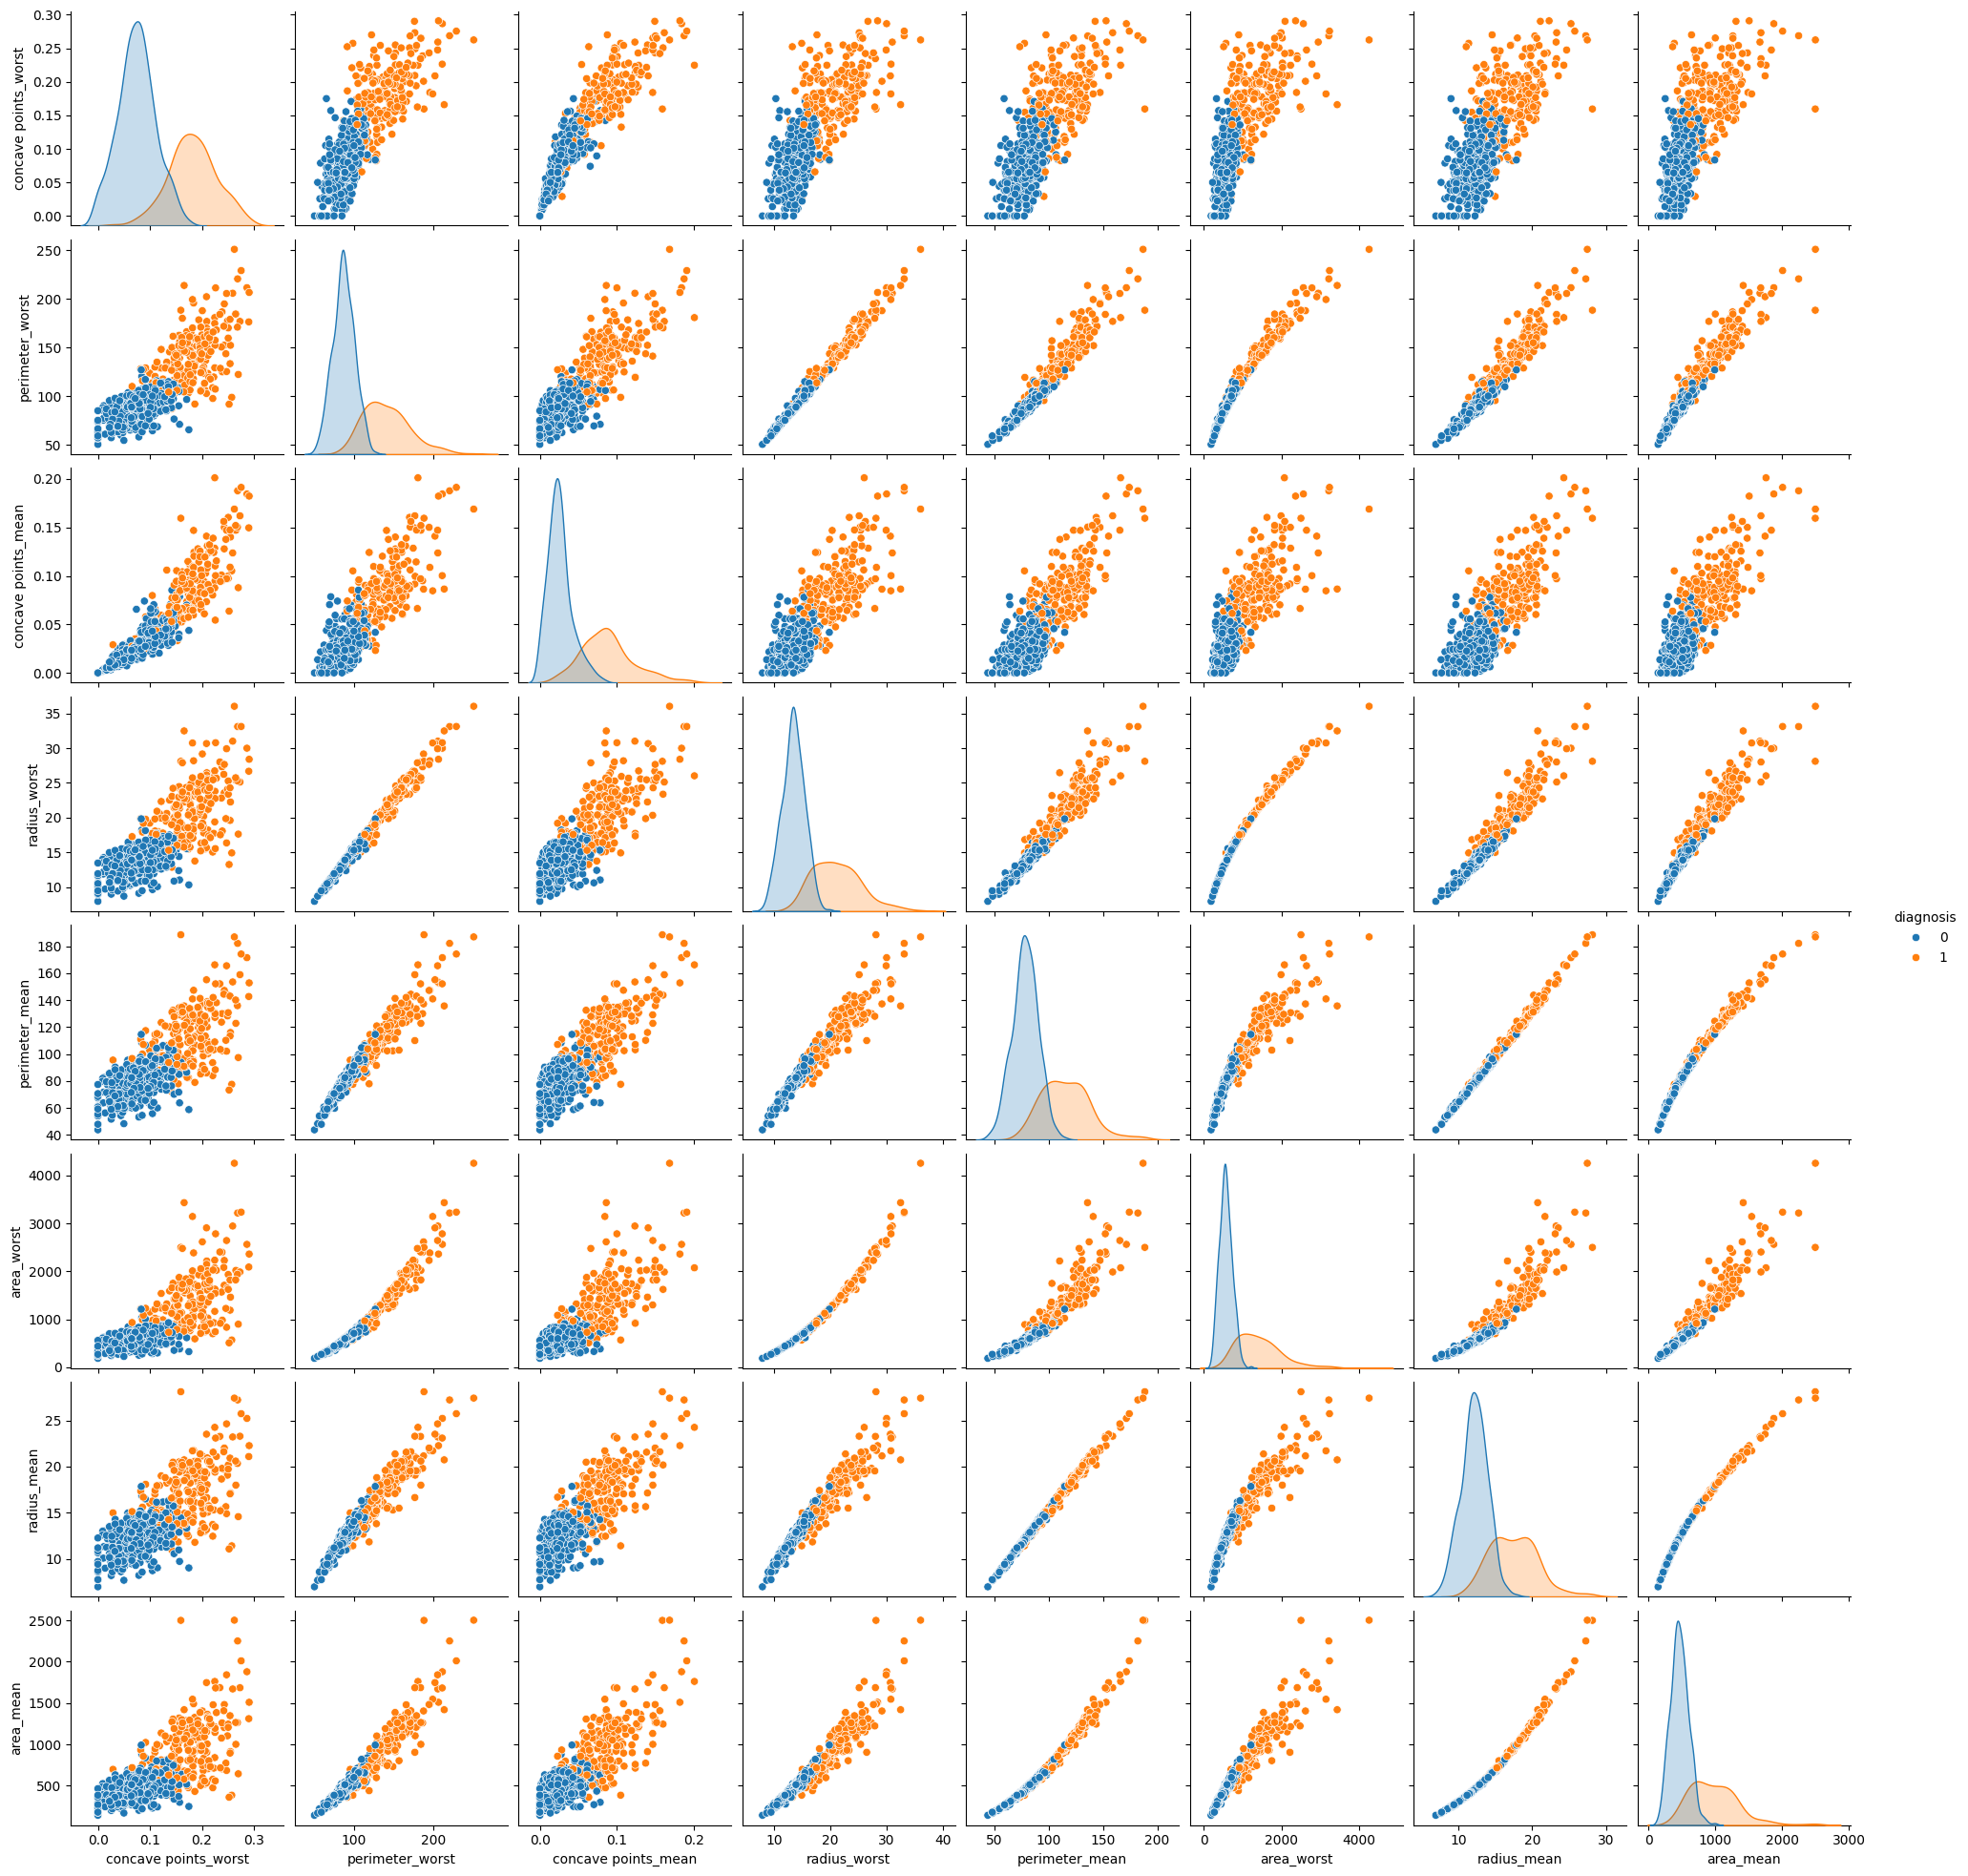

In [ ]:
sns.pairplot(cancer_corr, hue='diagnosis')

### Menggunakan Algoritma Random Forest dari SKLearn

In [ ]:
# Seleksi Feature dengan menggunakan Machine learning algoritma Random Forest Classifier

X = cancer.drop(columns=['diagnosis'])
y = cancer['diagnosis']

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print("Daftar Hubungan Korelasi terhadap Frature label")
print(importance_df)
threshold = 0.07

print("\nFeature terpilih yang melebihi threshold")
selected_features_RFC = importance_df[importance_df['Importance'] >= threshold]
print(selected_features_RFC)


Daftar Hubungan Korelasi terhadap Frature label
                    Feature  Importance
23          perimeter_worst    0.130831
28     concave points_worst    0.122974
24               area_worst    0.115132
21             radius_worst    0.106417
8       concave points_mean    0.104738
3            perimeter_mean    0.049843
4                 area_mean    0.048354
1               radius_mean    0.041071
7            concavity_mean    0.038765
14                  area_se    0.035971
27          concavity_worst    0.030761
22            texture_worst    0.019275
26        compactness_worst    0.017289
2              texture_mean    0.015873
13             perimeter_se    0.015479
25         smoothness_worst    0.013293
6          compactness_mean    0.011798
11                radius_se    0.011715
29           symmetry_worst    0.010188
17             concavity_se    0.007132
30  fractal_dimension_worst    0.007062
5           smoothness_mean    0.006295
18        concave points_se    0

<ipython-input-56-8f22d17173a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


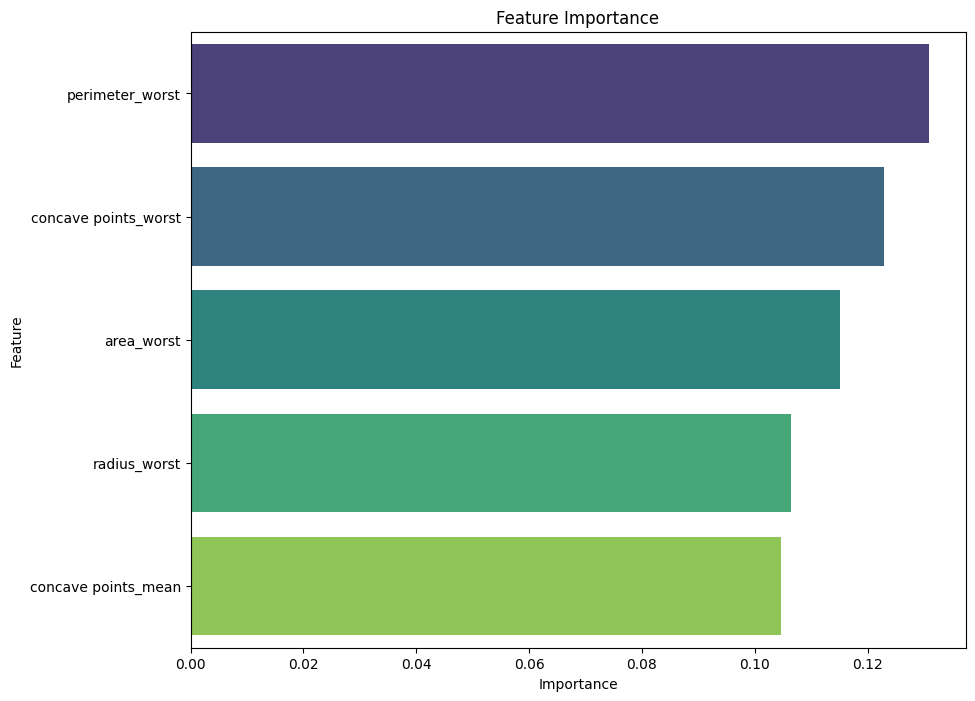

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x ='Importance',
    y='Feature',
    data=selected_features_RFC,
    palette='viridis'
)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [ ]:
selected_features_RFC_ls= selected_features_RFC['Feature'].tolist()
selected_features_RFC_ls.append('diagnosis')
cancer_RFC = cancer[selected_features_RFC_ls]
cancer_RFC.describe()

,perimeter_worst,concave points_worst,area_worst,radius_worst,concave points_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,107.261213,0.114606,880.583128,16.269190,0.048919,0.372583
std,33.602542,0.065732,569.356993,4.833242,0.038803,0.483918
min,50.410000,0.000000,185.200000,7.930000,0.000000,0.000000
25%,84.110000,0.064930,515.300000,13.010000,0.020310,0.000000
50%,97.660000,0.099930,686.500000,14.970000,0.033500,0.000000
75%,125.400000,0.161400,1084.000000,18.790000,0.074000,1.000000
max,251.200000,0.291000,4254.000000,36.040000,0.201200,1.000000


### Pemrosesan Feature yang didapat dari Random Forest

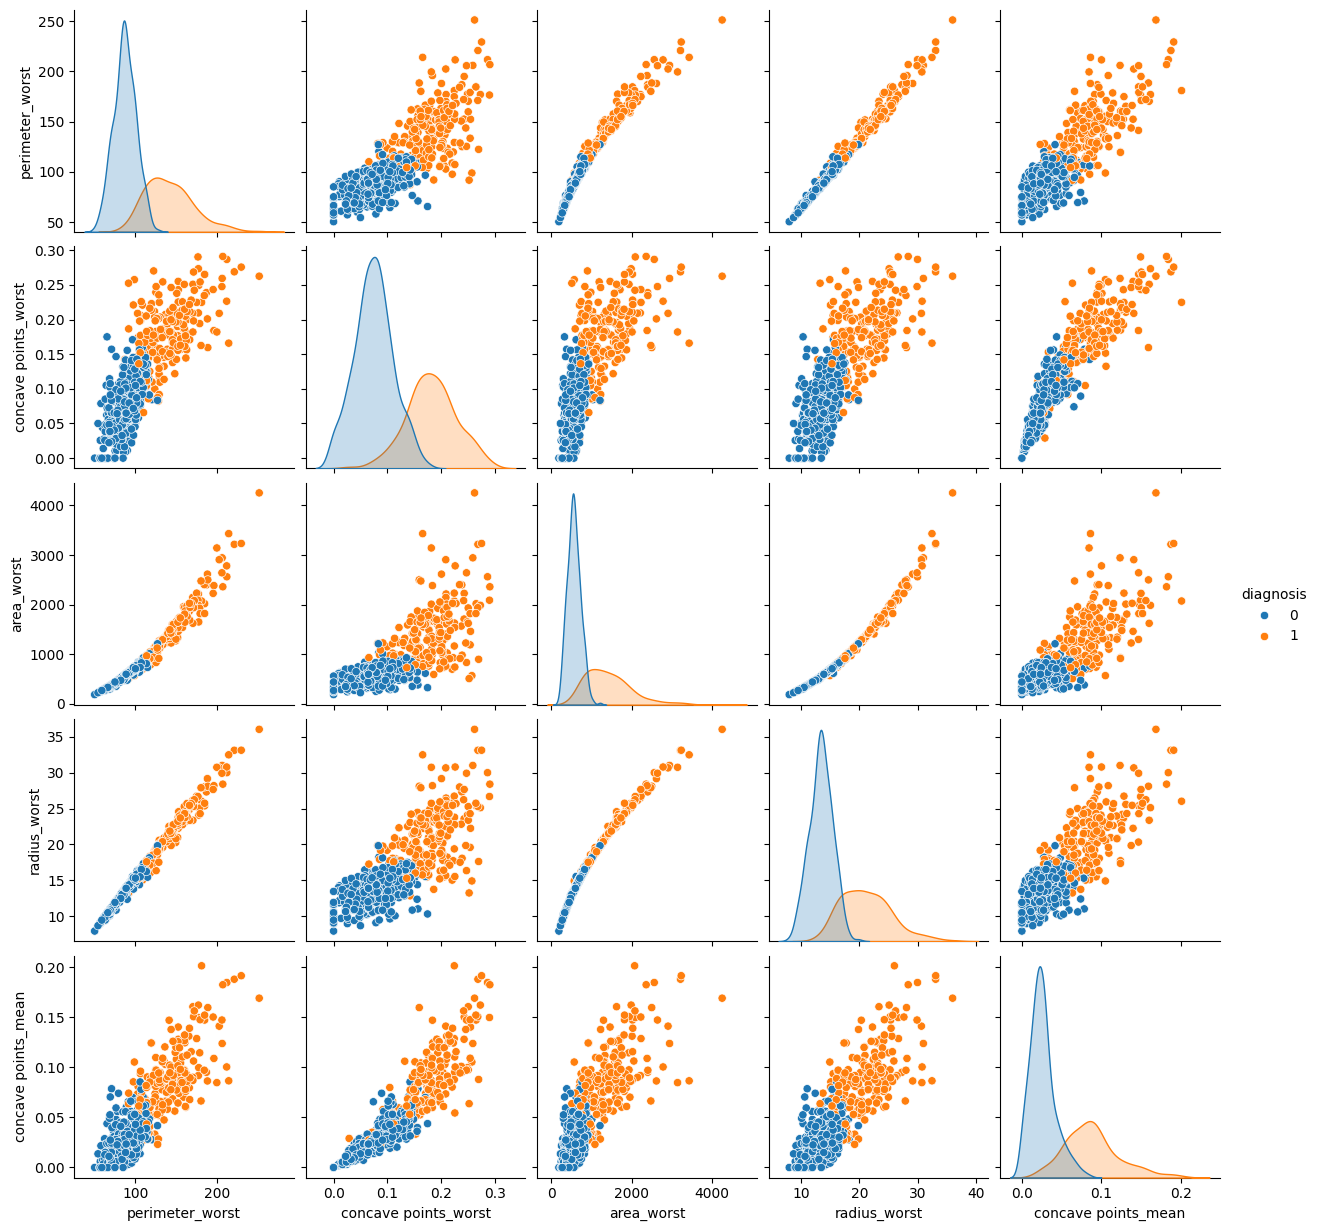

In [ ]:
sns.pairplot(cancer_RFC, hue='diagnosis')

# Implementasi Model Pembelajaran Mesin